In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

date_data = pd.read_csv("D:\Datasets\Dry_Bean_Dataset\Dry_Bean_Dataset.csv") 
date_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [25]:
date_data["Class"] = date_data["Class"].astype('category')
date_data.dtypes

In [26]:
date_data["Class"]= date_data["Class"].cat.codes
date_data.head()

In [27]:
x=date_data.iloc[:, :-1]
y=date_data.iloc[:, -1]
y.head()

0    SEKER
1    SEKER
2    SEKER
3    SEKER
4    SEKER
Name: Class, dtype: object

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [7]:
#preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [9]:
y_predict = clf_model.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

0.7903048108703635

In [29]:
target = list(date_data['Class'].unique())
feature_names = list(x.columns)

In [12]:
from sklearn.tree import export_text
r = export_text(clf_model, feature_names=feature_names)
print(r)

|--- MajorAxisLength <= -0.46
|   |--- ShapeFactor1 <= 0.23
|   |   |--- ShapeFactor3 <= 0.84
|   |   |   |--- class: 6
|   |   |--- ShapeFactor3 >  0.84
|   |   |   |--- class: 5
|   |--- ShapeFactor1 >  0.23
|   |   |--- Perimeter <= -0.68
|   |   |   |--- class: 3
|   |   |--- Perimeter >  -0.68
|   |   |   |--- class: 3
|--- MajorAxisLength >  -0.46
|   |--- ShapeFactor3 <= -1.15
|   |   |--- MinorAxisLength <= 0.29
|   |   |   |--- class: 4
|   |   |--- MinorAxisLength >  0.29
|   |   |   |--- class: 2
|   |--- ShapeFactor3 >  -1.15
|   |   |--- Perimeter <= 0.19
|   |   |   |--- class: 6
|   |   |--- Perimeter >  0.19
|   |   |   |--- class: 2



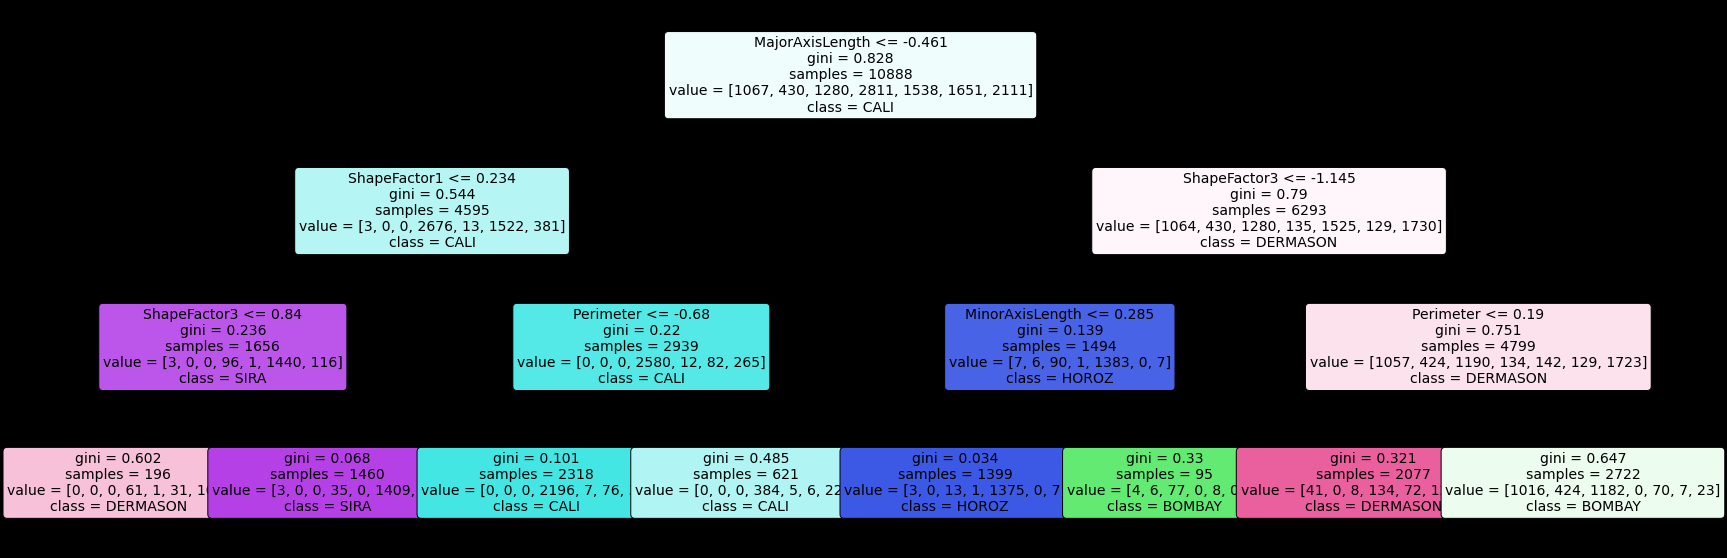

In [30]:
plt.figure(figsize=(30,10), facecolor ='k')
a = tree.plot_tree(clf_model,
                   feature_names = feature_names,
                   class_names = target,
                   rounded = True,
                   filled = True,
                   fontsize=14)


plt.show()